## Mineração de dados - Semana 5: 

### Exercício sobre análise de agrupamento

Neste exercício, iremos fazer uma tarefa de agrupamento hierárquico usando o algoritmo **complete-linkage**. Para isso, vamos usar uma base de dados sobre consumidores de um shopping.

Esses dados contém os seguintes campos:

* **CustomerID**: ID do cliente
* **Genre**: gênero
* **Age**: idade
* **Annual Income (k$)**: renda anual
* **Spending Score (1-100)**: pontuação de gastos - consumidores que gastam mais tem pontuação maior

Este exercício é baseado no exemplo retirado do artigo [Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/) de Usman Malik, StackAbuse.

Os [dados](https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv) foram obtidos do artigo acima e também estão disponíveis neste [link](https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv).


1. Crie um novo notebook e inclua uma descrição para ele. 

2. Nesta atividade, além das bibliotecas **pandas** e **numpy**, vamos importar a biblioteca **sklearn** (scikit learn) para usar o complete-linkage, e a **matplotlib** para gerar gráficos. Também vamos usar a **scipy** para plotar o dendograma.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams["figure.figsize"] = (15,10)

3. Importando a base de dados.

In [ ]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv'
shopping = pd.read_csv(url)
shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


4. Vamos ficar somente com as colunas **Annual Income** e **Spending Score** para poder ver os dados em um espaço bidimensional.

In [ ]:
shopping_2d = shopping[['Annual Income (k$)','Spending Score (1-100)']]
shopping_2d

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


5. Agora, vamos visualizar o dendograma usando o complete-linkage (parâmetro **method='complete'**), que vai nos indicar o número de grupos da base de dados.

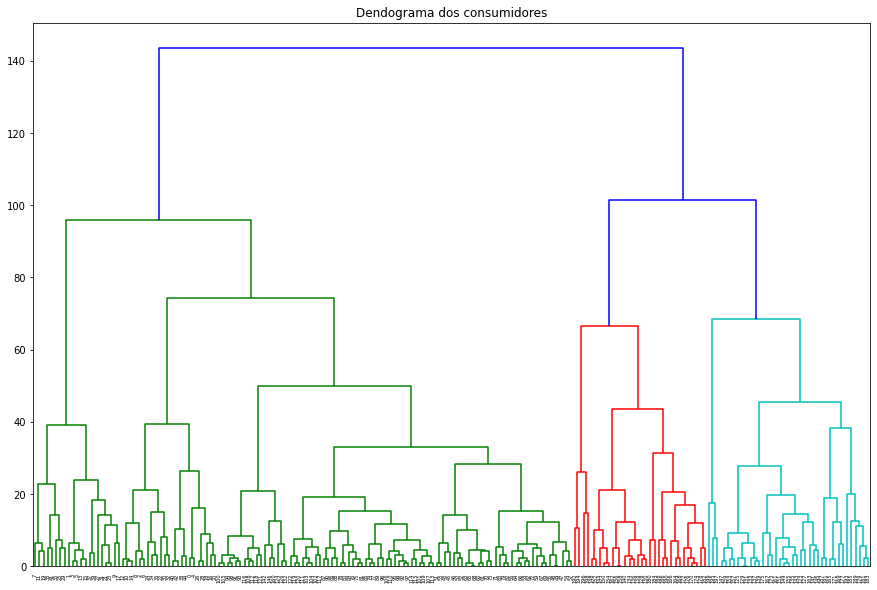

In [ ]:
plt.title("Dendograma dos consumidores")
dendograma = shc.dendrogram(shc.linkage(shopping_2d, method='complete'))

6. Observando o dendograma, as regiões com maior distância entre as linhas verticais contêm entre 2 e 7 grupos. Vamos usar o complete-linkage com 5 grupos para predizer a quais grupos as amostras pertencem. Vamos selecionar o número de grupos (**n_clusters**), a medida de similaridade (**affinity**) usada é a distância euclidiana e o algoritmo (**linkage**) é o complete-linkage.

  Como resultado, os valores de 0 a 4 indicam os grupos aos quais os objetos da base pertencem.

In [ ]:
n_grupos = 5
grupos = AgglomerativeClustering(n_clusters=n_grupos, affinity='euclidean', linkage='complete')
grupos.fit_predict(shopping_2d)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

7. A seguir, vamos ver o resultado do processo de agrupamento usando um gráfico de dispersão e pintando os objetos dos grupos com cores diferentes.

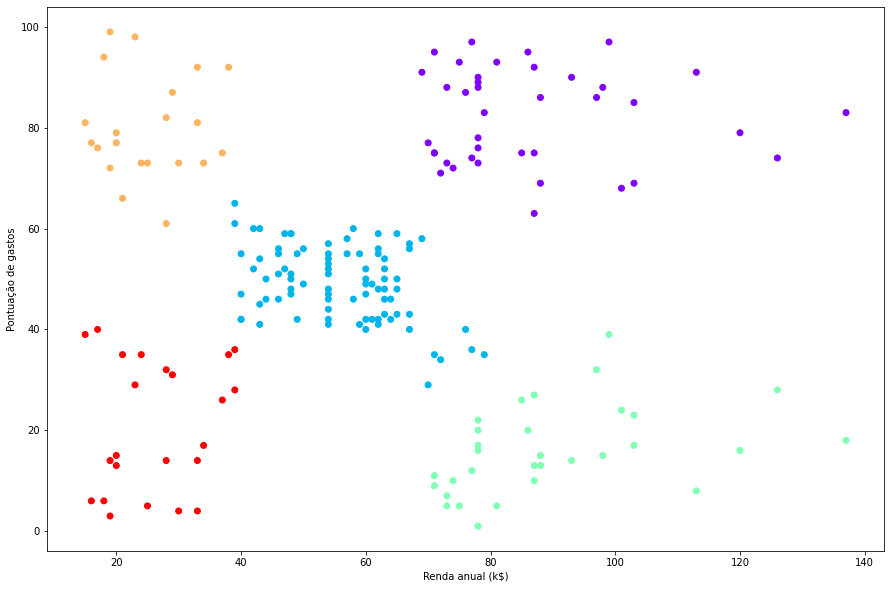

In [ ]:
plt.scatter(shopping_2d['Annual Income (k$)'],shopping_2d['Spending Score (1-100)'],c=grupos.labels_,cmap='rainbow')
plt.xlabel('Renda anual (k$)')
plt.ylabel('Pontuação de gastos')
plt.show()

Os pontos parecem se ajustar bem aos cinco grupos. Os grupos vermelho e azul estão mais próximos, e talvez pudessem ser um grupo só. Os pontos do lado direito abaixo (verdes) representam consumidores com alto salário, mas que gastamm pouco no shopping. Já os consumidores com alto salário e que gastam muito estão na parte superior direita (roxos). Em azul, no centro do gráfico, estão os consumidores com renda e gastos médios, e assim por diante. 

O modelo gerado pelo agrupamento pode ser usado, por exemplo, para direcionar promoções específicas para esses perfis de consumidores.

8. Para trazer mais informações para o gráfico de dispersão, podemos adicionar rótulos para os pontos. O código abaixo faz isso.

* 8.1: Usamos a função **subplots()**, que retorna a figura e os eixos do gráfico. 
* 8.2: No eixo do gráfico, criamos o gráfico de dispersão
* 8.3: Iteramos sobre o dataframe original para pegar o gênero dos consumidores
* 8.4: Para não poluir a visualização, só vamos incluir rótulos para o genêro somente com F (feminino) e M (masculino) .
* 8.5: A função **annotate** adiciona o rótulo do valor passado como primeiro parâmetro (**F ou M**) no ponto passado como segundo parâmetro: **shopping_2d['Annual Income (k$)'], shopping_2d['Spending Score (1-100)']**.

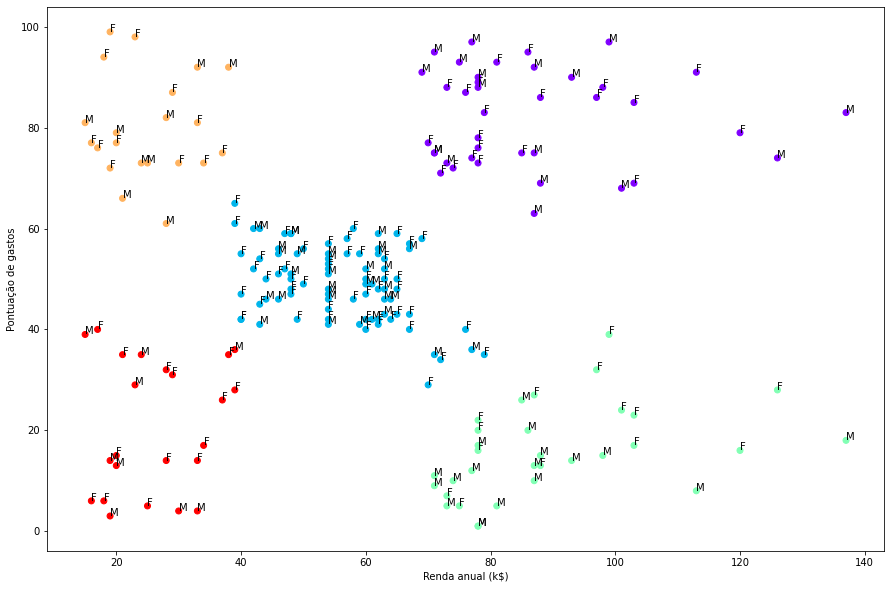

In [ ]:
fig, eixo = plt.subplots()

plt.scatter(shopping_2d['Annual Income (k$)'],shopping_2d['Spending Score (1-100)'],c=grupos.labels_,cmap='rainbow')
eixo.set_xlabel('Renda anual (k$)')
eixo.set_ylabel('Pontuação de gastos')

# iterando sobre o dataframe original, que tem o gênero dos consumidores
for i, texto in enumerate(shopping['Genre']):
    if texto == 'Female':
        eixo.annotate('F', (shopping.iloc[i]['Annual Income (k$)'],shopping.iloc[i]['Spending Score (1-100)']))
    else:
        eixo.annotate('M', (shopping.iloc[i]['Annual Income (k$)'],shopping.iloc[i]['Spending Score (1-100)']))

plt.show()

Com isso, concluímos esse tutorial. Você pode aprimorar seus conhecimentos analisando outras bases de dados do seu interesse. Experimente outros atributos desta base para explorar mais o agrupamento hierárquico. Tente usar também o algoritmo single-linkage e veja as diferenças.